In [39]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import numpy as np

In [8]:
filepath_SILO = ""
filepath_moisture = "Milgdarra_OzWALD_8day_soilmoisture_2017-2024.nc"

In [13]:
filepath_ANUClim = "Milgdarra_ANUClim_daily_rain_2017-2024.nc"
ds = xr.open_dataset(os.path.join("nci_data", filepath_ANUClim))
ds

<xarray.Dataset> Size: 2MB
Dimensions:  (time: 2372, lat: 13, lon: 13)
Coordinates:
  * time     (time) datetime64[ns] 19kB 2017-01-01 2017-01-02 ... 2023-06-30
  * lat      (lat) float64 104B -34.35 -34.37 -34.38 ... -34.45 -34.47 -34.48
  * lon      (lon) float64 104B 148.4 148.4 148.4 148.5 ... 148.5 148.5 148.5
Data variables:
    rain     (time, lat, lon) float32 2MB ...
    crs      float32 4B ...
Attributes: (12/27)
    time_coverage_start:     2023-05-01
    time_coverage_end:       2023-05-31
    DOI:                     10.25914/60a10aa934e7b
    summary:                 Daily total rainfall for the Australian continen...
    acknowledgement:         The creation of this data was funded by Commonwe...
    creator_name:            Michael Hutchinson, Tingbao Xu, Jennifer Kesteve...
    ...                      ...
    title:                   Daily total rainfall for the Australian continen...
    History:                 Translated to CF-1.0 Conventions by Netcdf-Java ...
    geospatial_lat_min:      -34.475
    geospatial_lat_max:      -34.355
    geospatial_lon_min:      148.425
    geospatial_lon_max:      148.545

In [15]:
rain = ds['rain']
time = ds['time']
lat = ds['lat']
lon = ds['lon']

In [46]:
np.datetime64("2020-07-28", 'ns')

numpy.datetime64('2020-07-28T00:00:00.000000000')

In [37]:
a = pd.to_datetime("2020-07-28")

In [38]:
type(a)

pandas._libs.tslibs.timestamps.Timestamp

In [49]:
rain.sel(time="2020-07-28")

<xarray.DataArray 'rain' (lat: 13, lon: 13)> Size: 676B
[169 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 8B 2020-07-28
  * lat      (lat) float64 104B -34.35 -34.37 -34.38 ... -34.45 -34.47 -34.48
  * lon      (lon) float64 104B 148.4 148.4 148.4 148.5 ... 148.5 148.5 148.5
Attributes:
    grid_mapping:           crs
    long_name:              Daily total rainfall for the Australian continent...
    units:                  mm day-1
    coverage_content_type:  modelResult
    _ChunkSizes:            [  1 100 100]

In [50]:
rain_at_time = rain.sel(time="2020-07-28")

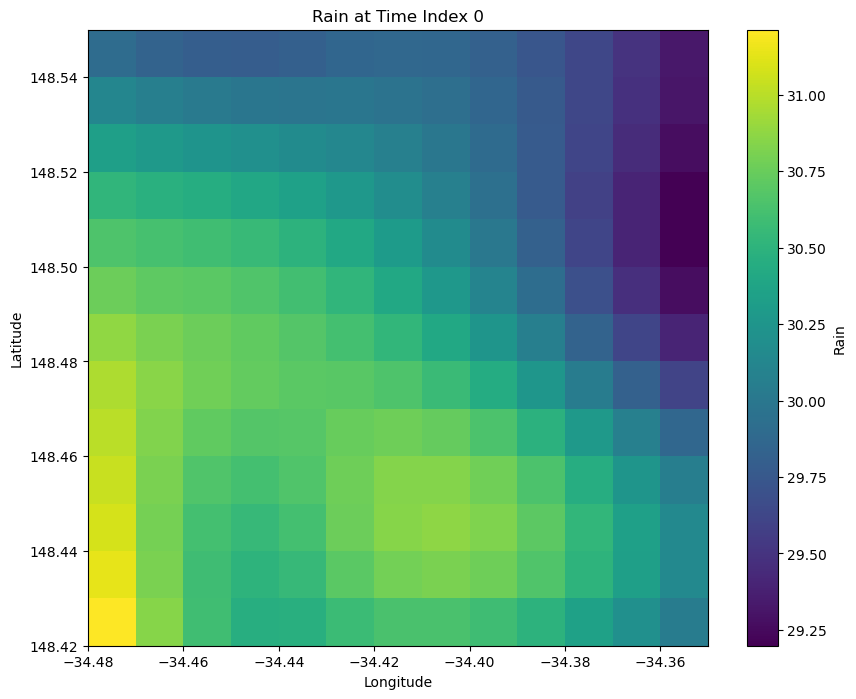

In [51]:
# Plot the 2D map at the selected timepoint
plt.figure(figsize=(10, 8))
plt.pcolormesh(lat, lon, rain_at_time, shading='nearest')
plt.colorbar(label='Rain')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Rain at Time Index {time_index}')
plt.show()

In [28]:
ds_timeslice = ds.sel(time=slice("2020-07-22", "2020-08-01"))
rain = ds_timeslice['rain']
time = ds_timeslice['time']
lat = ds_timeslice['lat']
lon = ds_timeslice['lon']

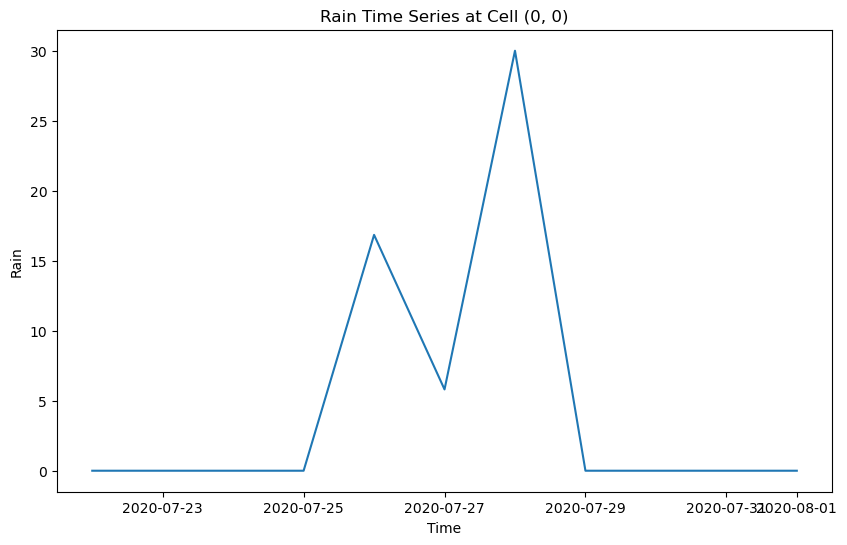

In [29]:
# Select a specific cell (e.g., at index [10, 10])
lat_index = 0
lon_index = 0
rain_at_cell = rain[:, lat_index, lon_index]

# Plot the time series of soil moisture at the selected cell
plt.figure(figsize=(10, 6))
plt.plot(time, rain_at_cell)
plt.xlabel('Time')
plt.ylabel('Rain')
plt.title(f'Rain Time Series at Cell ({lat_index}, {lon_index})')
plt.show()